
# Code

#### If the imports fail, run the install_packages notebook

teatment impulse


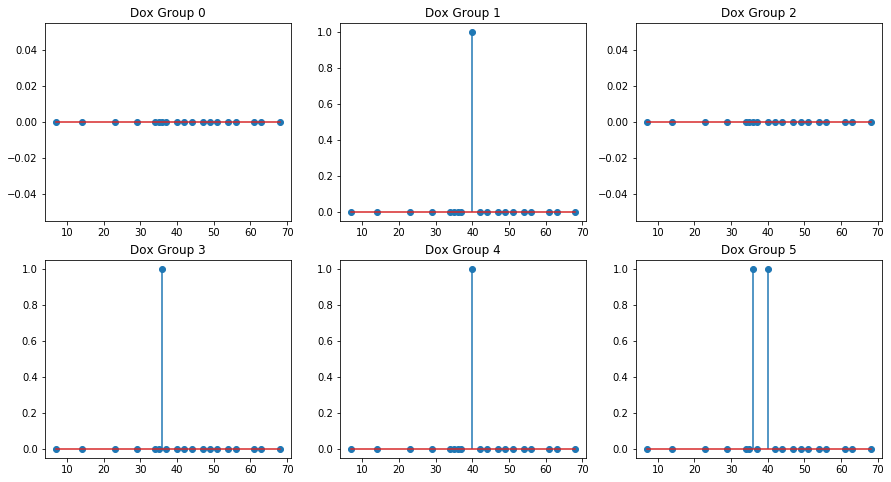

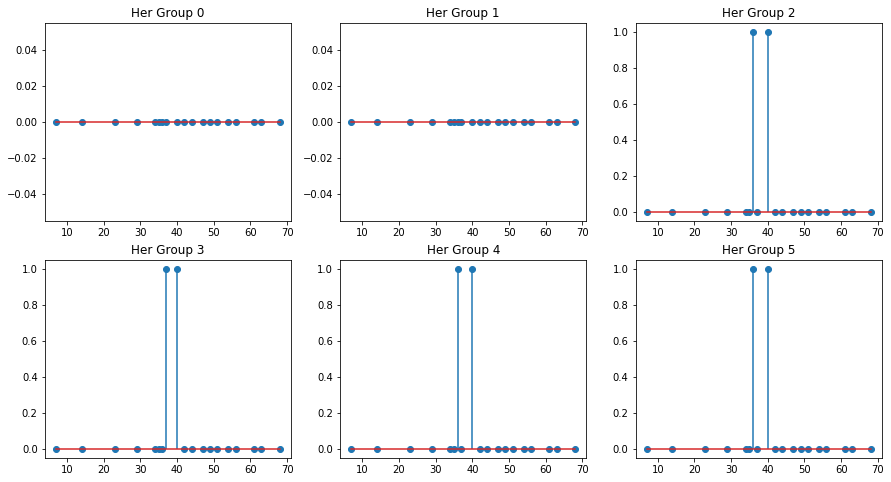

treatment impulse by group


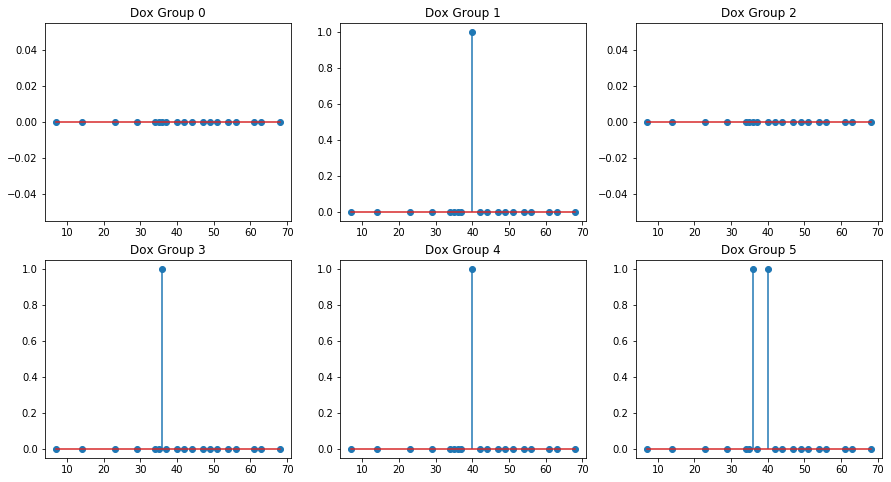

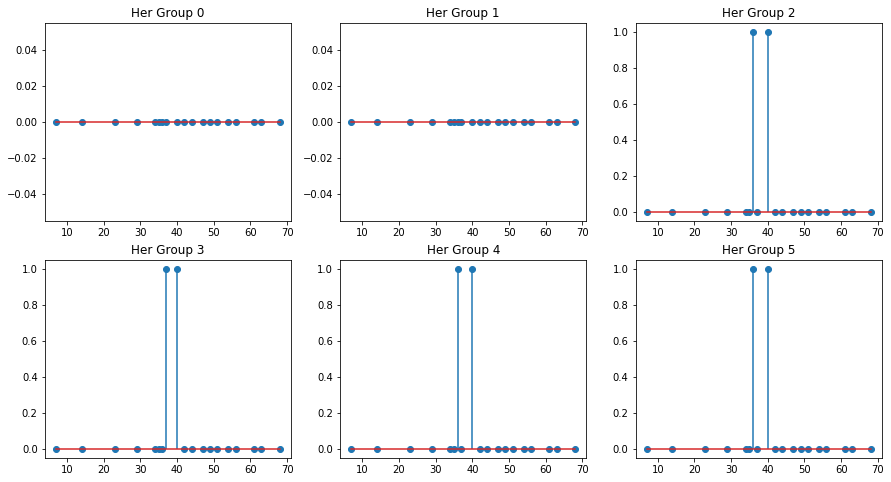

In [1]:
#data
from get_tumor_db import get_tumor_db
from parse_tumor_db import parse_tumor_db

#visualization
import plot_data

#treatment
import treatment_model as tm

#growth model
from growth_model import growth_model_1

#forward model
import rk_utils

#arrays
import numpy as np

#file system
import os

#CSV read
import pandas as pd



np.random.seed(123)

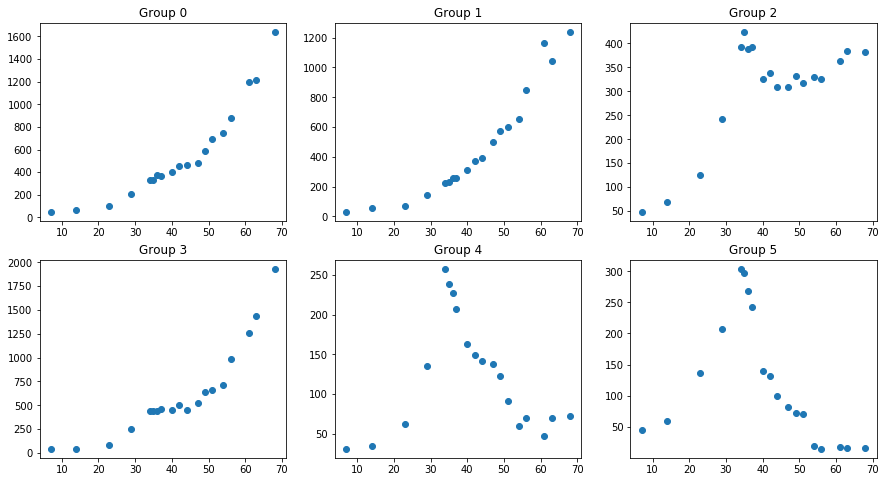

In [2]:
tumor_size_db = get_tumor_db()
ts, Ts, sigmas = parse_tumor_db(tumor_size_db)
plot_data.plot_tumor_data(ts, Ts)

In [3]:
sim_times = np.linspace(7,70,100*(70-7+1)) # original time indexing started at day 7

## Growth Model 1


$$ \frac{d \phi_t}{dt} = r \phi_t - \lambda_h \phi_h \phi_t  - (\lambda_d + \lambda_{hd} \phi_h ) \phi_d \phi_t $$

$$ \frac{d \phi_d}{dt} = - \tau_d \phi_d + \delta (t - \eta_d) D_d $$

$$ \frac{d \phi_h}{dt} = - \tau_h \phi_h + \delta (t - \eta_h) D_h e^{-\lambda_{dh} \phi_d} $$

r, lambda_h, lambda_d, lambda_hd, tau_d, tau_h, lambda_dh


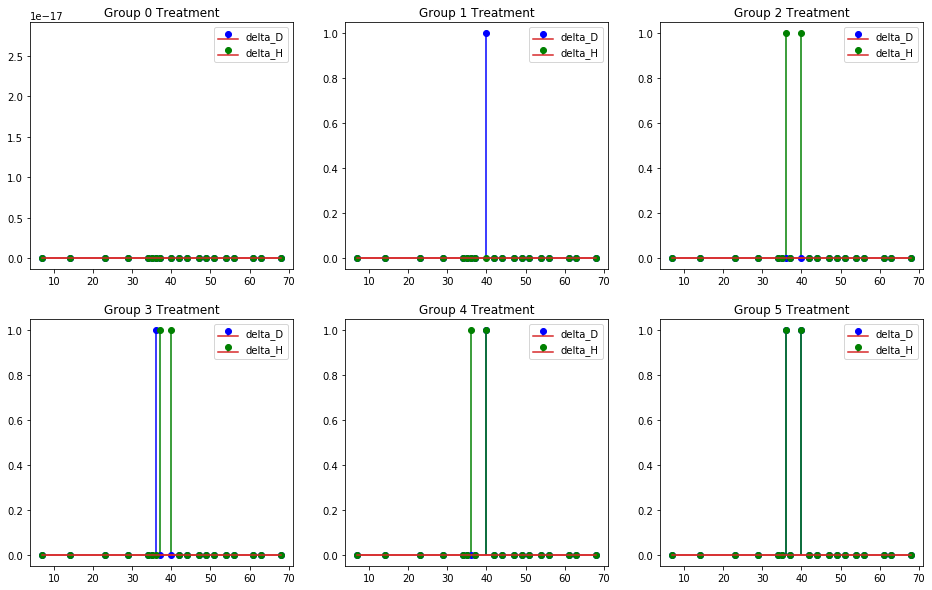

In [4]:
this_model = growth_model_1()

In [5]:

    
def sim_graph_model_1():
    sim_times = np.linspace(7,70,100*(70-7+1)) # original time indexing started at day 7
    this_model = growth_model_1()
    sim_graph_model(this_model, sim_times)
    
def sim_graph_model(this_model, sim_times):
    this_model.Sds = this_model.Sds_sim
    this_model.Shs = this_model.Shs_sim

    #save0

    r = 6.19e-2
    lambda_h = 2.89e-2
    lambda_d = 0
    lambda_hd = 7.03e-2
    tau_d = 1.72e-3
    tau_h = 4.17e-3
    lambda_dh = 9.78

    sim_T = this_model.simulate(r, lambda_h, lambda_d, lambda_hd, tau_d, tau_h, lambda_dh, sim_times)

    #plot_data.plot_sim(sim_times, sim_T)
    plot_data.plot_sims_vs_actual(this_model.groups, ts, Ts, sigmas, sim_times, sim_T)
    plot_data.plot_D(sim_times, this_model.sim_D)
    plot_data.plot_H(sim_times, this_model.sim_H)
    plot_data.plot_O(sim_times, this_model.sim_O)

    print('r = ' + str(r))
    print('lambda_h = ' +str(lambda_h))
    print('lambda_d = ' + str(lambda_d))
    print('lambda_hd = ' + str(lambda_hd))
    print('tau_d = ' + str(tau_d))
    print('tau_h = ' + str(tau_h)) 
    print('lambda_dh = ' + str(lambda_dh))
    
    """
    automate printing
    """

    return r, lambda_h, lambda_d, lambda_hd, tau_d, tau_h, lambda_dh


def fit_sim_graph_model_1():
    sim_times = np.linspace(7,70,100*(70-7+1)) # original time indexing started at day 7
    this_model = growth_model_1()
    fit_sim_graph_model(this_model, sim_times)
    
def fit_sim_graph_model(this_model, sim_times):
    this_model.backward()
    this_model.Sds = this_model.Sds_sim
    this_model.Shs = this_model.Shs_sim
    r, lambda_h, lambda_d, lambda_hd, tau_d, tau_h, lambda_dh  = [this_model.get_param(x) for x in this_model.param_list]
    sim_T = this_model.simulate(r, lambda_h, lambda_d, lambda_hd, tau_d, tau_h, lambda_dh, sim_times)

    #plot_data.plot_sim(sim_times, sim_T)
    plot_data.plot_sims_vs_actual(this_model.groups, ts, Ts, sigmas, sim_times, sim_T)
    plot_data.plot_D(sim_times, this_model.sim_D)
    plot_data.plot_H(sim_times, this_model.sim_H)
    plot_data.plot_O(sim_times, this_model.sim_O)

    print('r = ' + str(r))
    print('lambda_h = ' +str(lambda_h))
    print('lambda_d = ' + str(lambda_d))
    print('lambda_hd = ' + str(lambda_hd))
    print('tau_d = ' + str(tau_d))
    print('tau_h = ' + str(tau_h)) 
    print('lambda_dh = ' + str(lambda_dh))

    return r, lambda_h, lambda_d, lambda_hd, tau_d, tau_h, lambda_dh

    
    
#r, lambda_h, lambda_d, lambda_hd, tau_d, tau_h, lambda_dh = sim_graph_model_1()
#sim_graph_model_1()

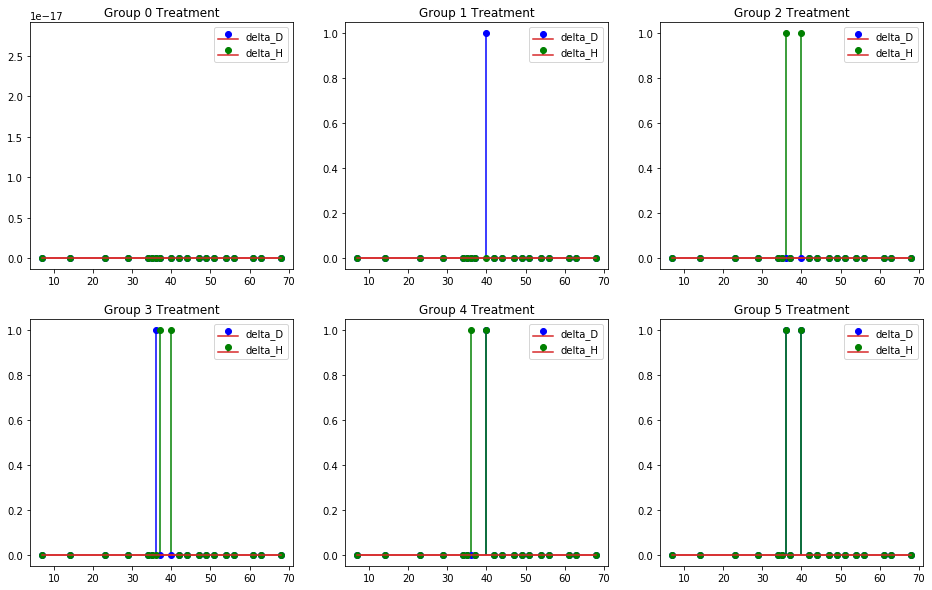

Only 80 samples in chain.
Sequential sampling (5 chains in 1 job)
CompoundStep
>Metropolis: [lambda_dh]
>Metropolis: [tau_h]
>Metropolis: [tau_d]
>Metropolis: [lambda_hd]
>Metropolis: [lambda_d]
>Metropolis: [lambda_h]
>Metropolis: [r]
Sampling chain 4, 0 divergences: 100%|█████████████████████████████████████████████████| 96/96 [00:03<00:00, 26.31it/s]
C:\Users\reidw\Anaconda3\lib\site-packages\pymc3\sampling.py:496: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
C:\Users\reidw\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\reidw\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplo

C:\Users\reidw\Anaconda3\lib\site-packages\arviz\stats\stats.py:1196: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  "For one or more samples the posterior variance of the log predictive "


Computed from 400 by 114 log-likelihood matrix

        Estimate       SE
IC_waic 16962888.11  5730625.95
p_waic  8480448.00        -

There has been a warning during the calculation. Please check the results.


TypeError: simulate() takes from 2 to 3 positional arguments but 9 were given

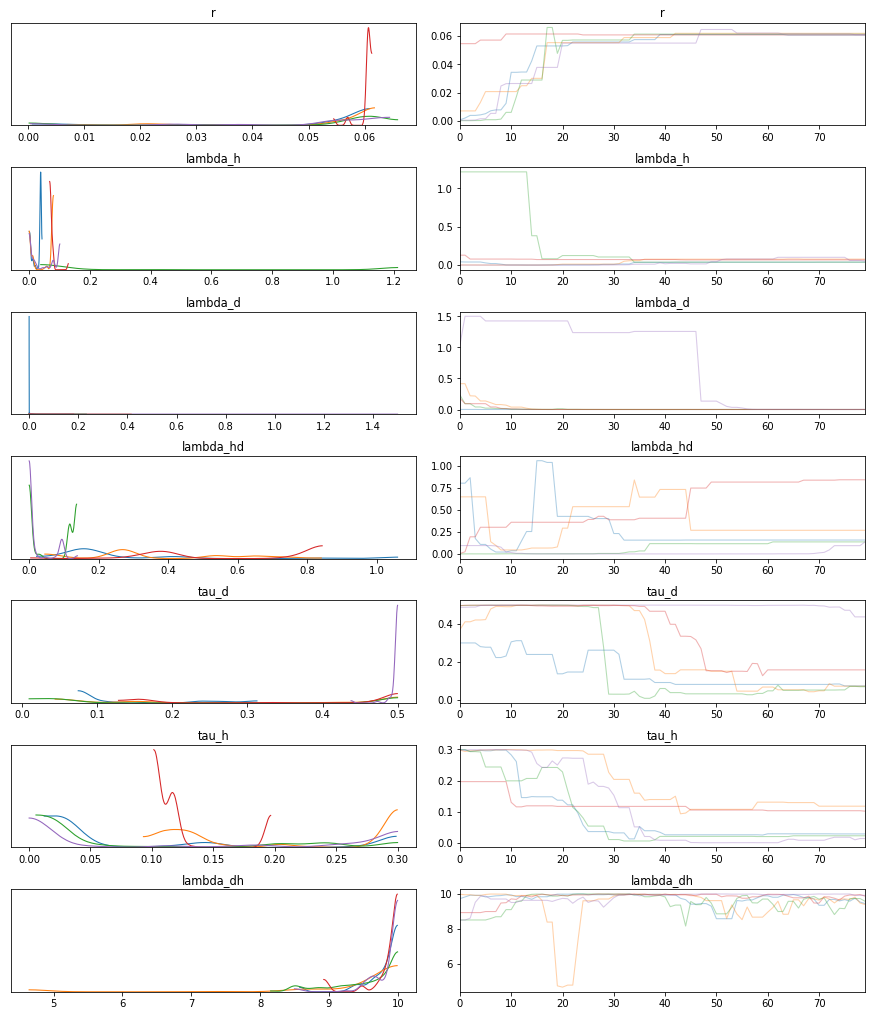

In [6]:
r, lambda_h, lambda_d, lambda_hd, tau_d, tau_h, lambda_dh = fit_sim_graph_model_1()